# Proyek Analisis Data: Bike Sharing
- **Nama:** Anugrah Bagas Kurniawan
- **Email:** anugrahbk088@gmail.com

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh Musim Terhadap Total Peminjaman Sepeda Untuk Setiap Tahunnya ?
- Bagaimana Pola Peminjaman Sepeda Untuk Setiap Bulan dan Tahun ?
- Bagaimana Perilaku Pelanggan Dalam Melakukan Penyewaan Sepeda Berdasarkan Jam Untuk Setiap Tahunnya ?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.patches import Patch

## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')
df_day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [4]:
df_hour = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
- Terdapat dua dataset diantaranya dataset hour dan day. Kedua dataset tersebut hanya memiliki satu perbedaan saja yakni pada dataset hour yang memiliki fitur hr untuk menunjukan jam pemesanan sepeda dilakukan

###Assessing Data

**MENILAI TABEL DAY**

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
df_day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [7]:
print("Jumlah Duplikasi Data : ", df_day.duplicated().sum())

Jumlah Duplikasi Data :  0


In [8]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pada dataset day tidak terdapat duplikasi data maupun missing values, sehingga dataset siap untuk digunakan.

**MENILAI TABEL HOURS**

In [9]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [10]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
print("Jumlah Duplikasi Data :", df_hour.duplicated().sum())

Jumlah Duplikasi Data : 0


In [13]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Pada dataset hour tidak terdapat duplikasi data maupun missing values, sehingga dataset siap untuk digunakan.

###**Cleaning Data**

**Dataset Day**

In [14]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
df_day["dteday"] = pd.to_datetime(df_day["dteday"], errors="coerce")
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [17]:
df_day['mnth_name'] = pd.to_datetime(df_day['mnth'], format='%m').dt.month_name()

In [18]:
year = {0: '2011', 1: '2012'}

df_day['yr'] = df_day['yr'].map(year)

In [19]:
season_name = {1: 'Springer', 2: 'Summer', 3:'Fall', 4:'Winter'}

df_day['season'] = df_day['season'].map(season_name)

In [20]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_name
0,1,2011-01-01,Springer,2011,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,January
1,2,2011-01-02,Springer,2011,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,January
2,3,2011-01-03,Springer,2011,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,January
3,4,2011-01-04,Springer,2011,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,January
4,5,2011-01-05,Springer,2011,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,January


**Insight:**
- Merubah nilai pada kolom season (1:springer, 2:summer, 3:fall, 4:winter)
- Meurbah nilai pada kolom yr
(0:2011, 1:2012)
- Merubah nilai pada kolom mnth

**Dataset Hour**

In [21]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [22]:
season_code = {1: 'Springer', 2: 'Summer', 3:'Fall', 4:'Winter'}

df_hour['season'] = df_hour['season'].map(season_code)

In [23]:
year_code = {0:2011, 1:2012}

df_hour['yr'] = df_hour['yr'].map(year_code)

In [24]:
df_hour['mnth_name'] = pd.to_datetime(df_hour['mnth'], format='%m').dt.month_name()

In [25]:
df_hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_name
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,January
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,January
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,January
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,January
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,Springer,2012,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,December
17375,17376,2012-12-31,Springer,2012,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,December
17376,17377,2012-12-31,Springer,2012,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,December
17377,17378,2012-12-31,Springer,2012,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,December


**Insight:**
- Merubah nilai pada kolom season (1:springer, 2:summer, 3:fall, 4:winter)
- Meurbah nilai pada kolom yr
(0:2011, 1:2012)
- Merubah nilai pada kolom mnth

## Exploratory Data Analysis (EDA)

### Explore Pola Peminjaman Sepeda Untuk Setiap Bulan Selama 2 Tahun

In [26]:
total_book = df_hour.groupby(['yr','mnth','mnth_name']).agg(
    total_count = ('cnt', 'sum')
).sort_values(by=['yr', 'mnth'], ascending=[True, True]).reset_index()
total_book

,yr,mnth,mnth_name,total_count
0,2011,1,January,38189
1,2011,2,February,48215
2,2011,3,March,64045
3,2011,4,April,94870
4,2011,5,May,135821
5,2011,6,June,143512
6,2011,7,July,141341
7,2011,8,August,136691
8,2011,9,September,127418
9,2011,10,October,123511


**Insight :**
- Total peminjaman pada tahun 2012 mengalami kenaikan pada bulan Januari hingga bulan September, namun juga mengalami penurunan pada bulan September hinga Desember
- Total peminjaman pada tahun 2011 mengalami kenaikan signifikan pada bulan Januari hingga bulan Juni, namun pada bulan Juni hingga September mengalami penurunan dengan perbedaan yang tidak terlalu signifikan, kemudian mengalami sedikit kenaikan hingga bulan September dan mengalami penurunan kembali hingga bulan Desember

### Explore Total Peminjaman Berdasarkan Musim Untuk Setiap Tahun

In [27]:
hourly_season = df_hour.groupby(['yr','season']).agg(
    total_count = ('cnt', 'sum')
).sort_values(by=['yr','total_count'], ascending=[True, False]).reset_index()
hourly_season

,yr,season,total_count
0,2011,Fall,419650
1,2011,Summer,347316
2,2011,Winter,326137
3,2011,Springer,150000
4,2012,Fall,641479
5,2012,Summer,571273
6,2012,Winter,515476
7,2012,Springer,321348


**Insight :**
- Terdapat perbedaan yang signifikan pada total peminjaman yang dilakukan untuk setiap musim
- Pada tahun 2011 peminjaman sepeda paling banyak dilakukan pada musim fall sedangkan paling sedikit dilakukan pada musim springer, begitu juga pada tahun 2012

### Explore Total Peminjaman Sepeda Berdasarkan Jam Untuk Setiap Bulan dan Tahun

In [28]:
hourly_book = df_hour.groupby(['yr','mnth','mnth_name','hr']).agg(
    total_count = ('cnt', 'sum')
).sort_values(by=['yr','mnth','hr'], ascending=[True, True, True]).reset_index()
hourly_book

,yr,mnth,mnth_name,hr,total_count
0,2011,1,January,0,438
1,2011,1,January,1,295
2,2011,1,January,2,197
3,2011,1,January,3,94
4,2011,1,January,4,44
...,...,...,...,...,...
571,2012,12,December,19,7226
572,2012,12,December,20,5113
573,2012,12,December,21,4027
574,2012,12,December,22,2889


**Insight:**
- Pada tahun 2011 peminjaman sepeda paling banyak dilakukan pada jam 17 begitu pula pada tahun 2012
- Sedangkan peminjaman paling sedikit dilakukan pada jam 4 baik pada tahun 2011 dan 2012

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Pola Peminjaman Sepeda Untuk Setiap Bulan dan Tahun ?

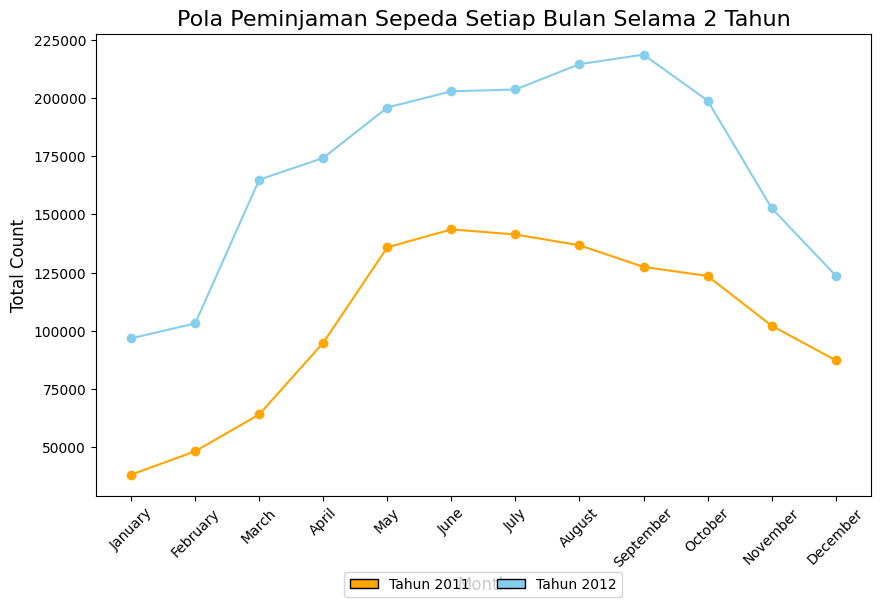

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(total_book[total_book['yr'] == 2011]['mnth_name'],
         total_book[total_book['yr']==2011]['total_count'],
         marker='o', linestyle='-', color='orange')

plt.plot(total_book[total_book['yr'] == 2012]['mnth_name'],
         total_book[total_book['yr']==2012]['total_count'],
         marker='o', linestyle='-', color='skyblue')



plt.title('Pola Peminjaman Sepeda Setiap Bulan Selama 2 Tahun', fontsize=16)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tick_params(axis='x', rotation=45)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Count', fontsize=12)

legend_elements = [
    Patch(facecolor='orange', edgecolor='black', label='Tahun 2011'),
    Patch(facecolor='skyblue', edgecolor='black', label='Tahun 2012')
]

# Menempatkan keterangan di luar area plot
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=10)

plt.show()

**Insight :**
- Pola peminjaman sepeda pada tahun 2011 dan 2012 mengalami kenaikan dan penurunan secara signifikan pada setiap bulan nya. Penurunan peminjaman sepeda pada kedua tahun sama-sama terjadi menjelang akhir tahun

### Pertanyaan 2: Bagaimana Pengaruh Musim Terhadap Total Peminjaman Sepeda Untuk Setiap Tahunnya ?

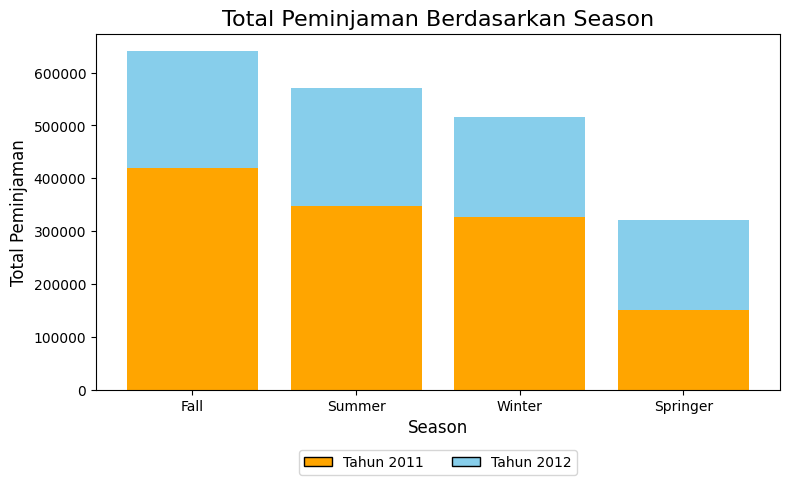

In [30]:
plt.figure(figsize=(8, 5))
plt.bar(hourly_season[hourly_season['yr']==2012]['season'],
        hourly_season[hourly_season['yr']==2012]['total_count'],
        color='skyblue')

plt.bar(hourly_season[hourly_season['yr']==2011]['season'],
        hourly_season[hourly_season['yr']==2011]['total_count'],
        color='orange')

legend_elements = [
    Patch(facecolor='orange', edgecolor='black', label='Tahun 2011'),
    Patch(facecolor='skyblue', edgecolor='black', label='Tahun 2012')
]

# Menempatkan keterangan di luar area plot
plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, fontsize=10)

plt.title("Total Peminjaman Berdasarkan Season", fontsize=16)
plt.xlabel("Season", fontsize=12)
plt.ylabel("Total Peminjaman", fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

**Insight:**
- Peminjaman pada tahun 2011 dan 2013 paling banyak dilakukan pada musim fall dan paling sedikit pada musimg springer. Total peminjaman memiliki perbedaan yang signifikan sehingga dapat disimpulkan bahwa musim berpengaruh terhadap peminjaman sepeda

### Pertanyaan 3: Bagaimana Perilaku Pelanggan Dalam Melakukan Penyewaan Sepeda Berdasarkan Jam Untuk Setiap Tahunnya ?

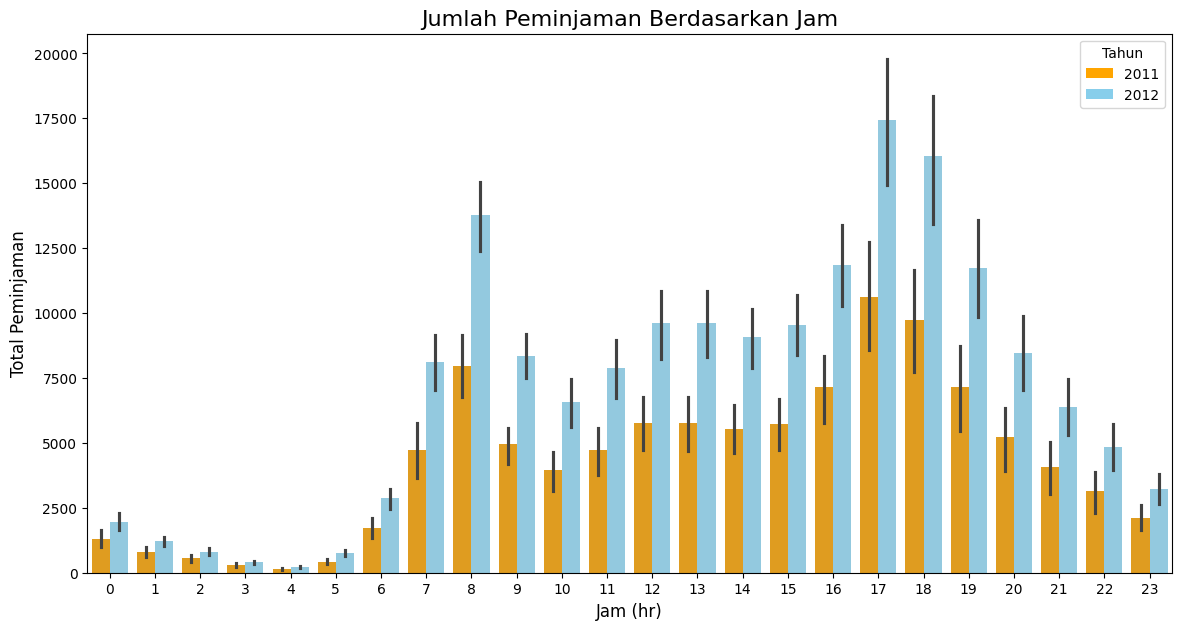

In [31]:
plt.figure(figsize=(14, 7))

custom_palette = ['orange', 'skyblue']
sn.barplot(data=hourly_book, x='hr', y='total_count', hue='yr', palette=custom_palette)
plt.title('Jumlah Peminjaman Berdasarkan Jam', fontsize=16)
plt.xlabel('Jam (hr)', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
legend_elements = [
    Patch(facecolor='orange', label='2011'),  # Sesuaikan warna dengan palette
    Patch(facecolor='skyblue', label='2012')    # Sesuaikan warna dengan palette
]
plt.legend(handles=legend_elements, title='Tahun', loc='upper right')
plt.show()

**Insight:**
- Peminjaman sepeda pada tahun 2011 dan 2012 paling banyak dilakukan pada jam 17 dan paling sedikit dilakukan pada jam 4

In [32]:
df_hour.head(25)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_name
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,January
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,January
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,January
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,January
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,January
5,6,2011-01-01,Springer,2011,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,January
6,7,2011-01-01,Springer,2011,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,January
7,8,2011-01-01,Springer,2011,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,January
8,9,2011-01-01,Springer,2011,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,January
9,10,2011-01-01,Springer,2011,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,January


In [33]:
casual_hour = df_hour.groupby(['yr']).agg(
    casual_count = ('casual', 'sum'),
    registered_count = ('registered', 'sum')
).sort_values(by=['yr'], ascending=[True]).reset_index()
casual_hour

,yr,casual_count,registered_count
0,2011,247252,995851
1,2012,372765,1676811


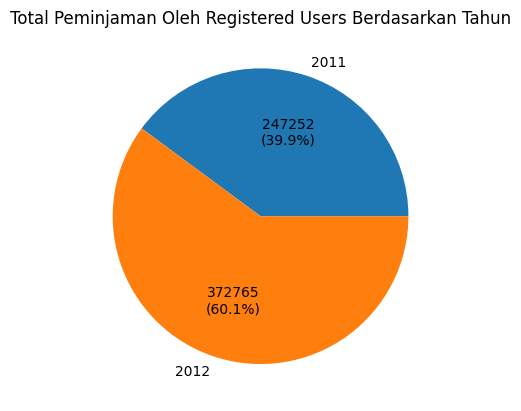

In [34]:
def autopct_with_count(pct, all_values):
    absolute = int(round(pct/100. * sum(all_values)))  # Hitung nilai absolut
    return f'{absolute}\n({pct:.1f}%)'  # Gabungkan nilai absolut dan persentase


fig, ax = plt.subplots()
ax.pie(
    casual_hour['casual_count'],
    labels=casual_hour['yr'],
    autopct=lambda pct: autopct_with_count(pct, casual_hour['casual_count'])
)

plt.title("Total Peminjaman Oleh Registered Users Berdasarkan Tahun")
plt.show()

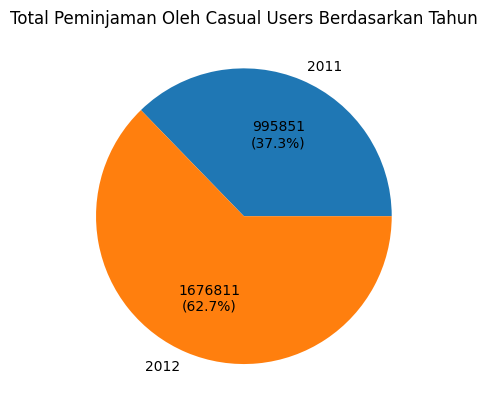

In [35]:
fig, ax = plt.subplots()
ax.pie(
    casual_hour['registered_count'],
    labels=casual_hour['yr'],
    autopct=lambda pct: autopct_with_count(pct, casual_hour['registered_count'])
)

plt.title("Total Peminjaman Oleh Casual Users Berdasarkan Tahun")
plt.show()

## Conclusion

- Pola peminjaman sepeda pada tahun 2011 dan 2012 mengalami kenaikan dan penurunan secara signifikan pada setiap bulan nya. Penurunan peminjaman sepeda pada kedua tahun sama-sama terjadi menjelang akhir tahun
- Peminjaman pada tahun 2011 dan 2013 paling banyak dilakukan pada musim fall dan paling sedikit pada musimg springer. Total peminjaman memiliki perbedaan yang signifikan sehingga dapat disimpulkan bahwa musim berpengaruh terhadap peminjaman sepeda
- Peminjaman sepeda pada tahun 2011 dan 2012 paling banyak dilakukan pada jam 17 dan paling sedikit dilakukan pada jam 4

In [36]:
df_hour.to_csv("dataset_cleaned.csv", index=False)

In [37]:
df_clean = pd.read_csv("dataset_cleaned.csv")
df_clean.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,mnth_name
0,1,2011-01-01,Springer,2011,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,January
1,2,2011-01-01,Springer,2011,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,January
2,3,2011-01-01,Springer,2011,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,January
3,4,2011-01-01,Springer,2011,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,January
4,5,2011-01-01,Springer,2011,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,January


In [38]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
 17  mnth_name   17379 non-null  object 
dtypes: float64(4), int64(11), object(3)
memory usage: 2.4+ MB
